In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs")

In [10]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [13]:
paths_result = ["/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_0_1.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_1_2.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_2_3.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_3_4.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_4_5.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_5_6.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_6_7.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_7_8.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_8_9.csv",
                "/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/GGM_vary_omega_logic0_9_10.csv"
               ]
oper_char = combine_files(paths_result)

In [14]:
def plotting_lineplot(data, x_order, x_axis, hue, jitter_amounts, metric_list, arrange='cols'):

    # Sort the DataFrame by the custom order of "p" values
    data[x_axis] = pd.Categorical(data[x_axis], categories=x_order, ordered=True)
    data = data.sort_values(by=[x_axis, hue])

    # Set the style of the plot
    sns.set(style="darkgrid")

    # Function to create error bars
    def plot_metric(ax, metric_name):
        quantiles = [0.125, 0.5, 0.875]
        quantile_df = data.groupby([x_axis, hue])[metric_name].quantile(quantiles).unstack().reset_index()

        for method in data[hue].unique():
            error_data = quantile_df[quantile_df[hue] == method]
            x_values = error_data[x_axis].values
            x_jittered = [x_order.index(p) + jitter_amounts.get(method, 0) for p in x_values]

            ax.errorbar(x=x_jittered, y=error_data[0.5], 
                        yerr=[error_data[0.5] - error_data[0.125], error_data[0.875] - error_data[0.5]],
                        fmt='o', linestyle='-', capsize=4, label=f"CI 75% ({method})")

        ax.set_xticks(ticks=np.arange(len(x_order)))
        ax.set_xticklabels(x_order)
        ax.set_xlabel(x_axis)
        ax.set_ylabel(metric_name)
        if metric_name == 'coverage rate':
            ax.set_ylim(0, 1.05)
        
    if arrange == 'cols':
        # Creating subplots for each metric
        fig, axes = plt.subplots(nrows=1, ncols=len(metric_list), 
                                 figsize=(16, 8))  # Adjust size as neede
    else:
        # Creating subplots for each metric
        fig, axes = plt.subplots(ncols=1, nrows=len(metric_list), 
                                 figsize=(14, len(metric_list)*4 + 2))  # Adjust size as neede
    
    if len(metric_list) == 1:
        plot_metric(axes, metric_list[0])
        # Add a main title
        #plt.suptitle("Line Plots with Non-Random Jittered Error Bars for Different Methods and Metrics", fontsize=14)

        # Create a single legend for the entire figure
        handles, labels = axes.get_legend_handles_labels()
    else:
        for i in range(len(metric_list)):
            plot_metric(axes[i], metric_list[i])
        # Add a main title
        #plt.suptitle("Line Plots with Non-Random Jittered Error Bars for Different Methods and Metrics", fontsize=14)

        # Create a single legend for the entire figure
        handles, labels = axes[0].get_legend_handles_labels()

    
    fig.legend(handles, labels, loc='lower center', title=hue, ncol=4)
    if arrange == 'cols':
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the layout to make room for the main title
    else:
        plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust the layout to make room for the main title
    plt.show()


In [17]:
def plotting_lineplot_vary_omega(data, x_axis, metric_list, arrange='cols'):

    # Set the style of the plot
    sns.set(style="darkgrid")

    # Function to create error bars
    def plot_metric(ax, metric_name):
        quantiles = [0.125, 0.5, 0.875]
        quantile_df = data.groupby([x_axis])[metric_name].quantile(quantiles).unstack().reset_index()

        
        error_data = quantile_df
        x_values = error_data[x_axis].values

        ax.errorbar(x=x_values, y=error_data[0.5], 
                    yerr=[error_data[0.5] - error_data[0.125], error_data[0.875] - error_data[0.5]],
                    fmt='o', linestyle='-', capsize=4)#, label=f"CI 75% ({method})")

        ax.set_xlabel(x_axis)
        ax.set_ylabel(metric_name)
        if metric_name == 'coverage rate':
            ax.set_ylim(0, 1.05)
        
    if arrange == 'cols':
        # Creating subplots for each metric
        fig, axes = plt.subplots(nrows=1, ncols=len(metric_list), 
                                 figsize=(16, 8))  # Adjust size as neede
    else:
        # Creating subplots for each metric
        fig, axes = plt.subplots(ncols=1, nrows=len(metric_list), 
                                 figsize=(14, len(metric_list)*4 + 2))  # Adjust size as neede
    
    if len(metric_list) == 1:
        plot_metric(axes, metric_list[0])
        # Add a main title
        #plt.suptitle("Line Plots with Non-Random Jittered Error Bars for Different Methods and Metrics", fontsize=14)

        # Create a single legend for the entire figure
        handles, labels = axes.get_legend_handles_labels()
    else:
        for i in range(len(metric_list)):
            plot_metric(axes[i], metric_list[i])
        # Add a main title
        #plt.suptitle("Line Plots with Non-Random Jittered Error Bars for Different Methods and Metrics", fontsize=14)

        # Create a single legend for the entire figure
        handles, labels = axes[0].get_legend_handles_labels()

    
    fig.legend(handles, labels, loc='lower center', ncol=4)
    if arrange == 'cols':
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the layout to make room for the main title
    else:
        plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust the layout to make room for the main title
    plt.show()

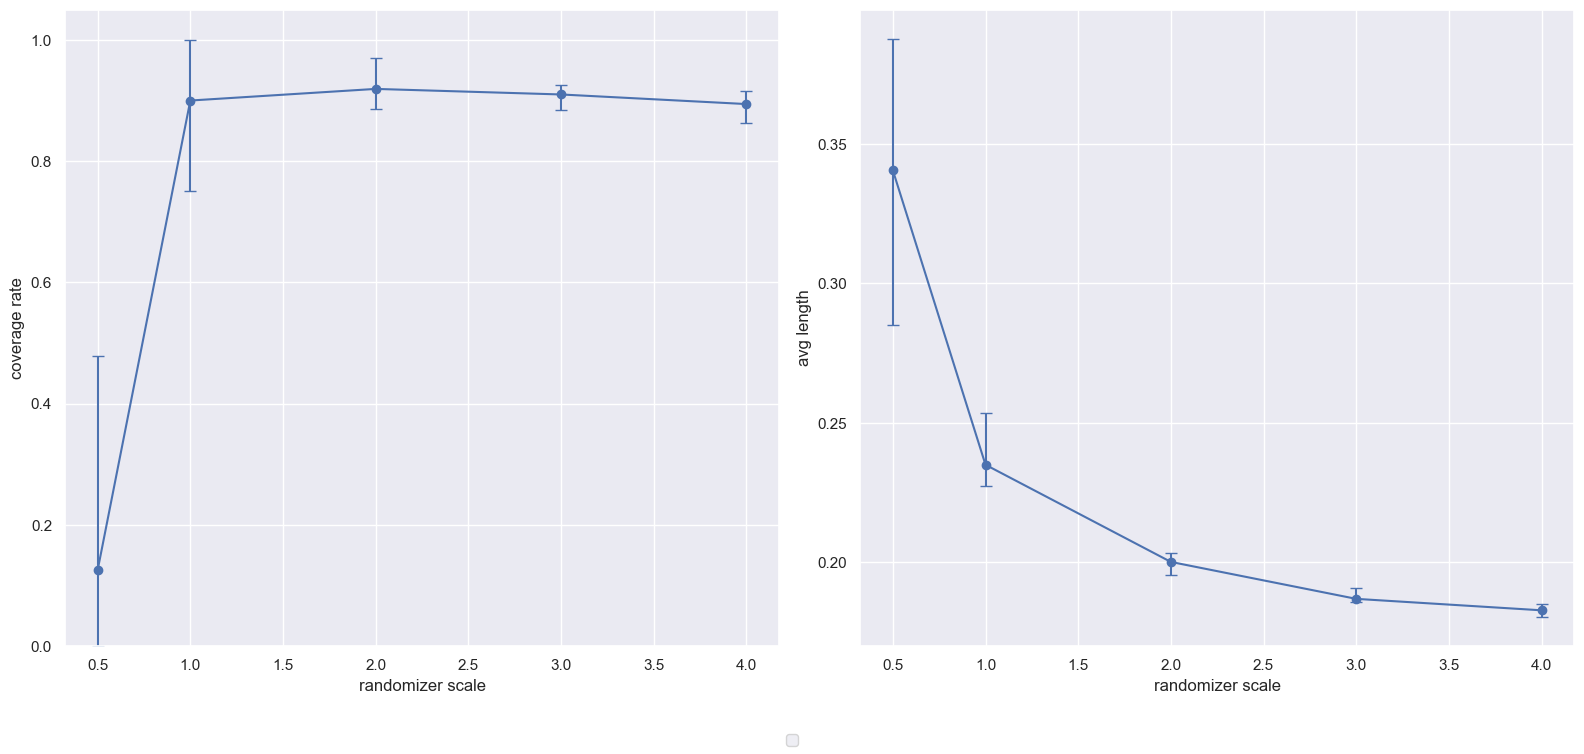

In [18]:
plotting_lineplot_vary_omega(data=oper_char, x_axis='randomizer scale', 
                             metric_list=['coverage rate', 'avg length'], arrange='cols')

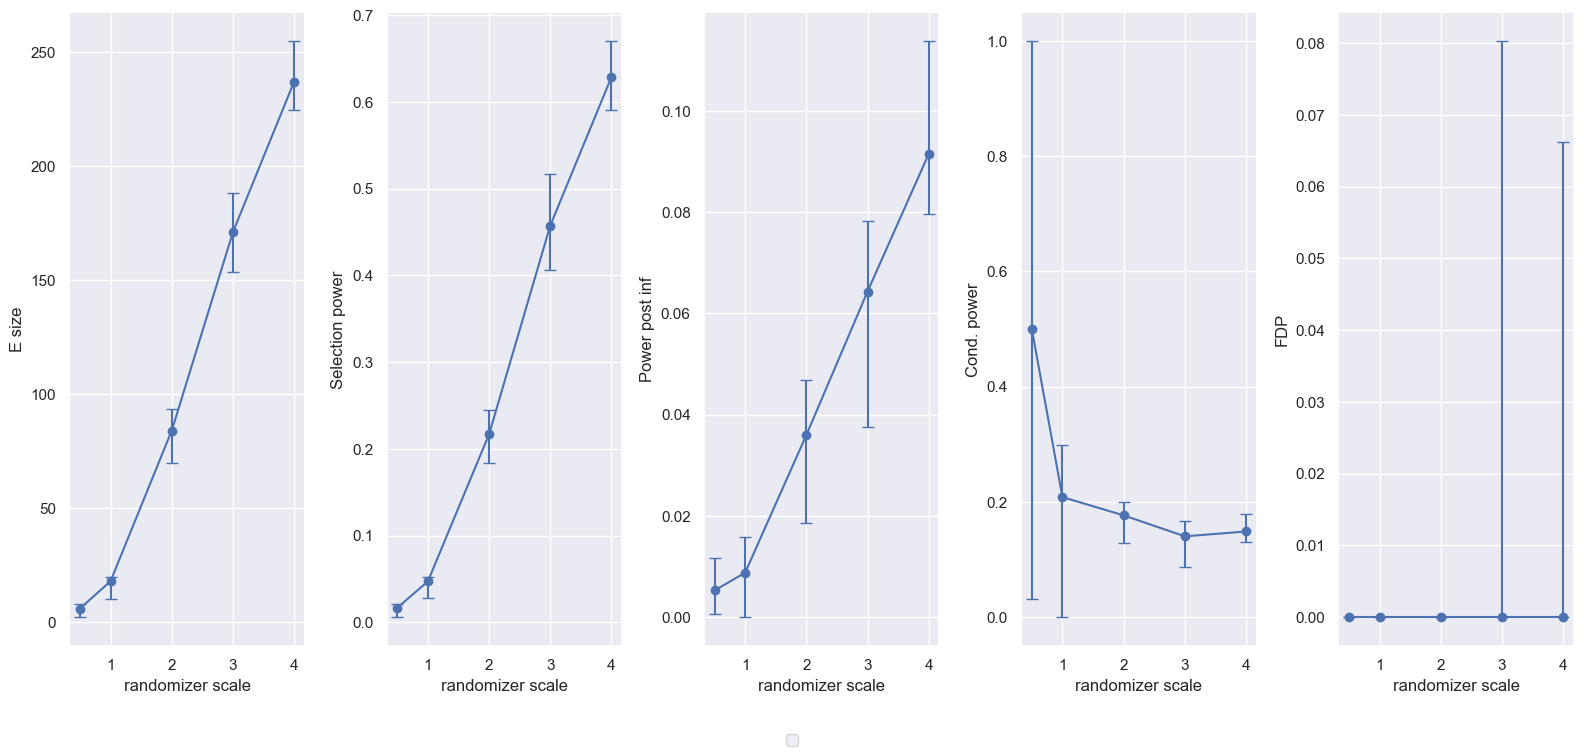

In [20]:
plotting_lineplot_vary_omega(data=oper_char, x_axis='randomizer scale',
                             metric_list=['E size', 'Selection power', 
                                          'Power post inf', 'Cond. power', 'FDP'], 
                             arrange='cols')

Plotting Comparison of Three Methods (Pilot)

AND

In [297]:
paths_result = ["comparison_pilot/GGM_naive_ds_approx_logic1_0_5.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_5_10.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_10_15.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_15_20.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_20_25.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_25_30.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_30_35.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_35_40.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_40_45.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic1_45_50.csv"
               ]
oper_char = combine_files(paths_result, "GGM_naive_ds_approx_logic1_50runs.csv")

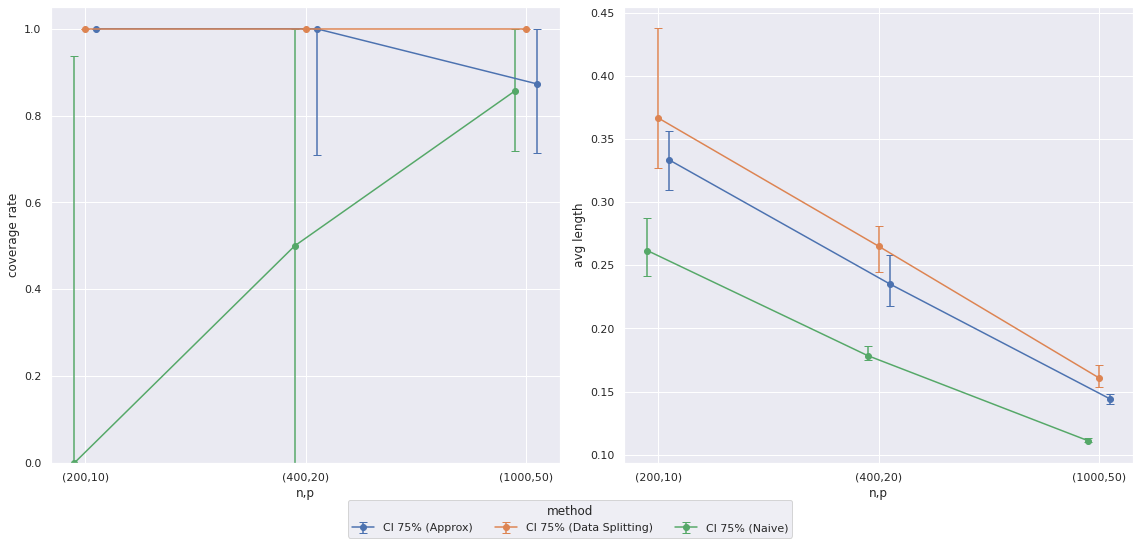

In [298]:
# Specify the order of "p" values
x_order = ["(200,10)", "(400,20)", "(1000,50)"]
# Define non-random jitter amounts
jitter_amounts = {
        "Naive": -0.05,
        "Data Splitting": 0.0,
        "Approx": 0.05
    }
#oper_char['randomizer scale'] = oper_char['randomizer scale'].astype(str)

plotting_lineplot(data=oper_char, x_order=x_order, x_axis='n,p', hue='method', 
                  jitter_amounts=jitter_amounts, metric_list=['coverage rate', 'avg length'], arrange='cols')

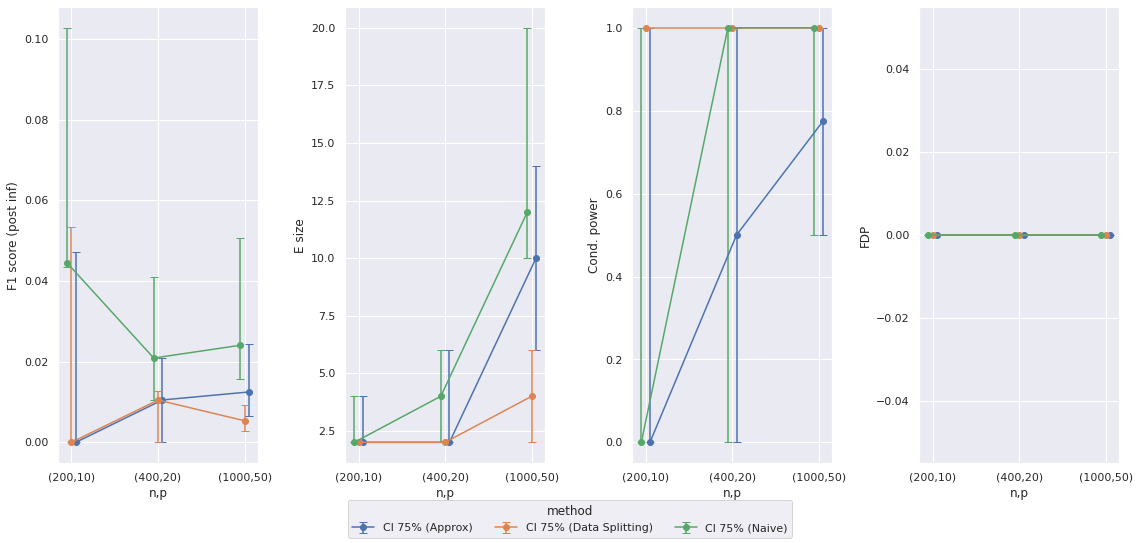

In [299]:
plotting_lineplot(data=oper_char, x_order=x_order, x_axis='n,p', hue='method', 
                  jitter_amounts=jitter_amounts, metric_list=['F1 score (post inf)', 'E size', 'Cond. power', 'FDP'])

OR

In [300]:
paths_result = ["comparison_pilot/GGM_naive_ds_approx_logic0_0_5.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_5_10.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_10_15.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_15_20.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_20_25.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_25_30.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_30_35.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_35_40.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_40_45.csv",
                "comparison_pilot/GGM_naive_ds_approx_logic0_45_50.csv"
               ]
oper_char = combine_files(paths_result, "GGM_naive_ds_approx_logic0_50runs.csv")

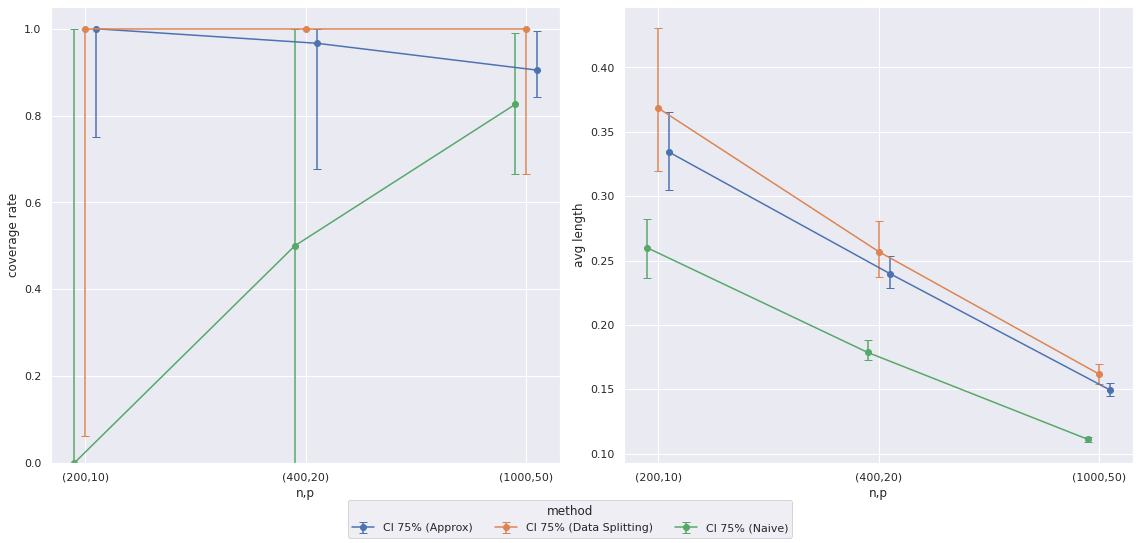

In [301]:
# Specify the order of "p" values
x_order = ["(200,10)", "(400,20)", "(1000,50)"]
# Define non-random jitter amounts
jitter_amounts = {
        "Naive": -0.05,
        "Data Splitting": 0.0,
        "Approx": 0.05
    }
#oper_char['randomizer scale'] = oper_char['randomizer scale'].astype(str)

plotting_lineplot(data=oper_char, x_order=x_order, x_axis='n,p', hue='method', 
                  jitter_amounts=jitter_amounts, metric_list=['coverage rate', 'avg length'], arrange='cols')

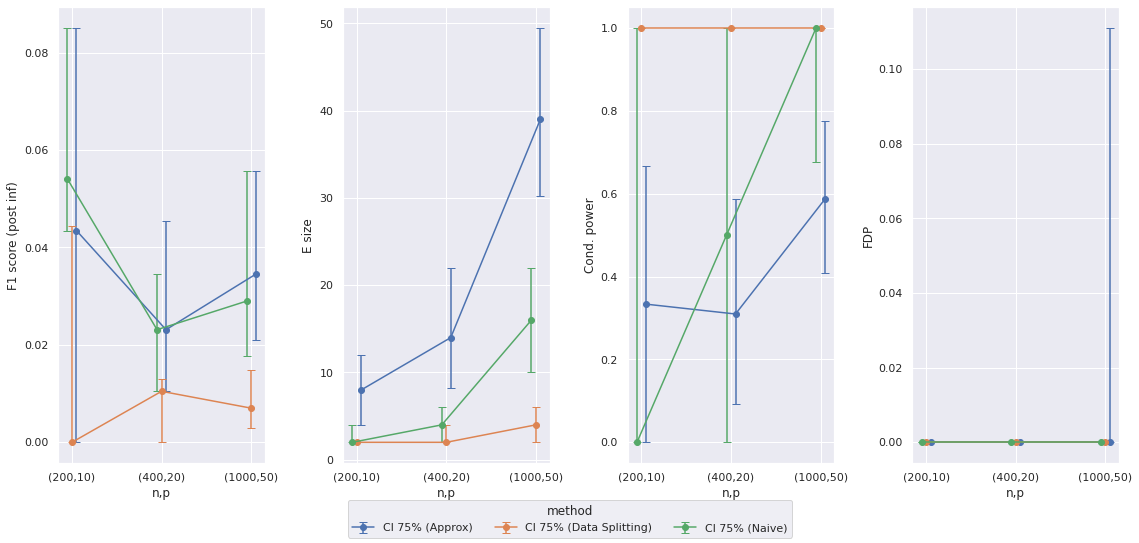

In [302]:
plotting_lineplot(data=oper_char, x_order=x_order, x_axis='n,p', hue='method', 
                  jitter_amounts=jitter_amounts, metric_list=['F1 score (post inf)', 'E size', 'Cond. power', 'FDP'])